<a href="https://colab.research.google.com/github/presentchris/Computer-Vision/blob/main/Practice_of_Stats%26Modelings4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##단순 선형 회귀

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
# 예제 데이터 생성
X = 2*np.random.rand(100, 1)
y = 4+3*X+np.random.randn(100,1)

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측 및 성능 평가
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 Score: 0.7114345747424383
RMSE: 1.0335322052447635


##Fashion MNIST 이미지 분류

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
# 데이터 로딩 및 전처리
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
train_X = train_X.reshape((60000,28,28,1)).astype('float32')/255
test_X = test_X.reshape((10000,28,28,1)).astype('float32')/255
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [ ]:
# 모델 구축
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ])

In [ ]:
# 컴파일 및 학습
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_X, train_y, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 47s 30ms/step - loss: 0.4171 - accuracy: 0.8538 - val_loss: 0.3134 - val_accuracy: 0.8876
Epoch 2/5
1500/1500 [==============================] - 41s 28ms/step - loss: 0.2799 - accuracy: 0.8990 - val_loss: 0.2775 - val_accuracy: 0.9016
Epoch 3/5
1500/1500 [==============================] - 40s 27ms/step - loss: 0.2313 - accuracy: 0.9160 - val_loss: 0.2514 - val_accuracy: 0.9088
Epoch 4/5
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1980 - accuracy: 0.9269 - val_loss: 0.2501 - val_accuracy: 0.9124
Epoch 5/5
1500/1500 [==============================] - 50s 33ms/step - loss: 0.1686 - accuracy: 0.9377 - val_loss: 0.2396 - val_accuracy: 0.9172


In [ ]:
# 성능 평가
test_loss, test_acc = model.evaluate(test_X, test_y)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 8ms/step - loss: 0.2518 - accuracy: 0.9120
Test accuracy: 0.9120000004768372


##LSTM을 사용한 시계열 예측

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

In [ ]:
# 임의의 시계열 데이터 생성
data = np.sin(np.linspace(0,20,100)) + np.random.normal(0,0.1,100)

In [ ]:
# 데이터 전처리
X, y = [], []
for i in range(len(data)-5):
  X.append(data[i:i+5])
  y.append(data[i+5])

X = np.array(X).reshape(-1, 5, 1)
y = np.array(y)

In [ ]:
# 모델 구축
model = Sequential([
    LSTM(50, activation = 'relu', input_shape = (5,1)),
    Dense(1)
])

In [ ]:
# 컴파일 및 학습
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X, y , epochs = 5, verbose = 2)

Epoch 1/5
3/3 - 2s - loss: 0.5216 - 2s/epoch - 716ms/step
Epoch 2/5
3/3 - 0s - loss: 0.4887 - 15ms/epoch - 5ms/step
Epoch 3/5
3/3 - 0s - loss: 0.4568 - 16ms/epoch - 5ms/step
Epoch 4/5
3/3 - 0s - loss: 0.4285 - 16ms/epoch - 5ms/step
Epoch 5/5
3/3 - 0s - loss: 0.4001 - 13ms/epoch - 4ms/step


1/1 [==============================] - 0s 213ms/step


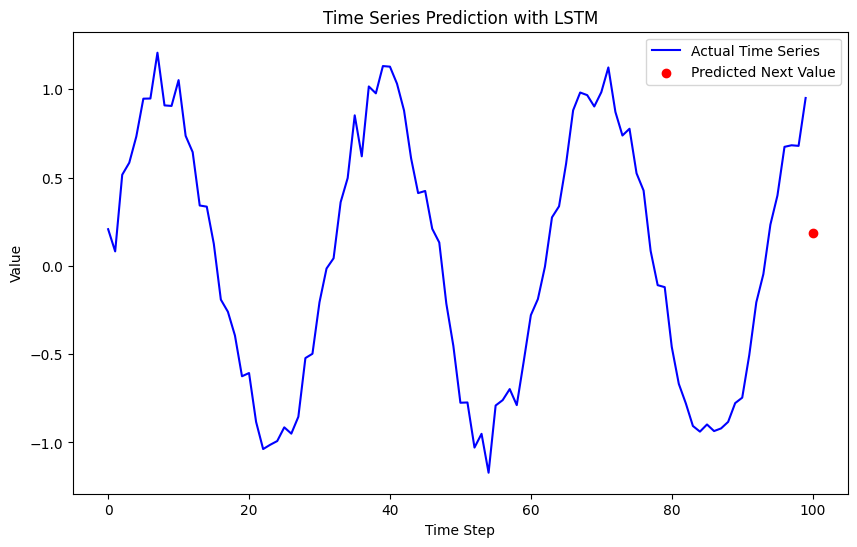

In [ ]:
# 예측 및 시각화
import matplotlib.pyplot as plt

# 예측을 위한 입력 데이터 준비
# 여기서는 마지막 5개의 데이터 포인트를 사용하여 다음 포인트를 예측
# 실제 문제에서는 새로운 데이터 또는 테스트 데이터셋을 사용할 수 있음
X_new = data[-5:].reshape(1,5,1)
y_pred = model.predict(X_new)

# 실제 값과 예측 값 시각화
plt.figure(figsize = (10, 6))
plt.plot(np.arange(len(data)), data, label = 'Actual Time Series', color = 'blue')
plt.scatter(len(data), y_pred, color = 'red', label = 'Predicted Next Value')
plt.legend()
plt.title('Time Series Prediction with LSTM')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()